<a href="https://colab.research.google.com/github/georgywasiat/Email-Spam-Detection/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Georgy Banny Rizky Wasiat

Evaluation of Classification Models in Machine Learning for Detecting Spam Emails: Case Studies on Support Vector Machine (SVM) Algorithms, Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), and Decision Trees.

In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Unduh sumber daya NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
pip install gensim

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
email = pd.read_csv('/content/drive/My Drive/Portofolio/email.csv')

email_df = pd.DataFrame(email)

In [ ]:
email.head(50)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [ ]:
email = email_df[['text', 'label']]

email.head(20)

,text,label
0,Subject: enron methanol ; meter # : 988291\r\n...,ham
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham
3,"Subject: photoshop , windows , office . cheap ...",spam
4,Subject: re : indian springs\r\nthis deal is t...,ham
5,Subject: ehronline web address change\r\nthis ...,ham
6,Subject: spring savings certificate - take 30 ...,ham
7,Subject: looking for medication ? we ` re the ...,spam
8,Subject: noms / actual flow for 2 / 26\r\nwe a...,ham
9,"Subject: nominations for oct . 21 - 23 , 2000\...",ham


In [ ]:
#Pemahaman Data
print("Info dataset:")
print(email.info())

#Penanganan Data Duplikat
email.drop_duplicates(inplace=True)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5171 non-null   object
 1   label   5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB
None


<ipython-input-10-5461e682d89d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email.drop_duplicates(inplace=True)


In [ ]:
# Tentukan kolom teks dan label sentimen
text_column = 'text'  # Gantilah dengan nama kolom teks pada dataset Anda
sentiment_column = 'label'  # Gantilah dengan nama kolom sentimen pada dataset Anda

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus karakter yang tidak diperlukan, tanda baca, atau simbol khusus
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))

    # Normalisasi teks: mengubah huruf kapital menjadi huruf kecil
    text = text.lower()

    # Menghapus kata-kata tidak relevan atau noise (contoh: kata dengan panjang kurang dari 3)
    text = ' '.join(word for word in text.split() if len(word) > 2)

      # Menghapus kata "subject"
    text = text.replace('subject', '')

    return text

# Terapkan fungsi ke kolom teks pada dataset
email[text_column] = email[text_column].apply(clean_text)

# Cetak informasi dataset setelah pembersihan teks
print(email[[text_column, sentiment_column]].head(20))

                                                 text label
0    enron methanol meter 988291 this follow the n...   ham
1    hpl nom for january 2001 see attached file hp...   ham
2    neon retreat around that most wonderful time ...   ham
3    photoshop windows office cheap main trending ...  spam
4    indian springs this deal book the teco pvr re...   ham
5    ehronline web address change this message int...   ham
6    spring savings certificate take off save when...   ham
7    looking for medication the best source diffic...  spam
8    noms actual flow for agree forwarded melissa ...   ham
9    nominations for oct 2000 see attached file hp...   ham
10   vocable rnd word asceticism vcsc brand new st...  spam
11   report 01405 wffur attion brom est inst siupi...  spam
12   enron hpl actuals for august 2000 teco tap 00...   ham
13   vic odin berne hotbox carnal bride cutworm dy...  spam
14   tenaska july darren please remove the price t...   ham
15   underpriced issue with high return 

<ipython-input-11-0716627dd938>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email[text_column] = email[text_column].apply(clean_text)


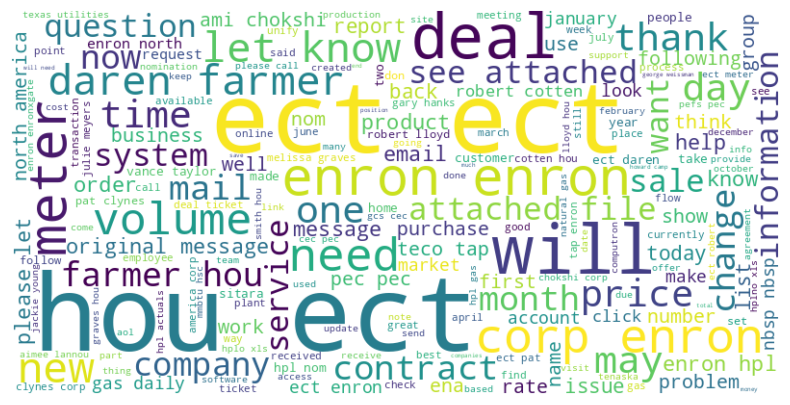

In [ ]:
# Gabungkan semua teks menjadi satu string
all_text = ' '.join(email[text_column])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

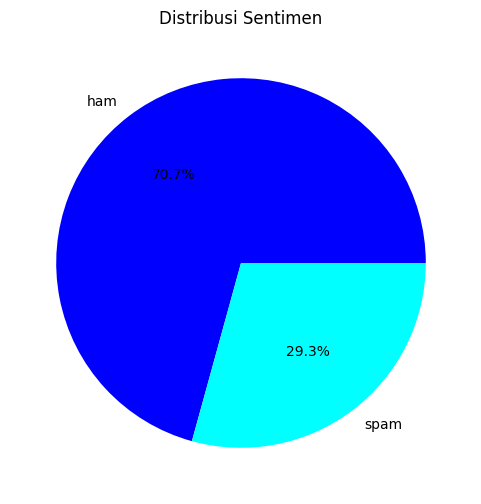

In [ ]:
sentiment_distribution = email['label'].value_counts()

# Buat grafik distribusi sentimen dalam bentuk diagram pie
plt.figure(figsize=(6, 6))
sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'cyan'])
plt.title('Distribusi Sentimen')
plt.ylabel('')  # Menghapus label sumbu Y

plt.show()

In [ ]:
# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    # Tokenisasi teks menggunakan NLTK
    tokens = word_tokenize(text)

    return tokens

# Terapkan fungsi ke kolom teks pada DataFrame menggunakan .loc
email.loc[:, 'Tokens'] = email.loc[:, text_column].apply(tokenize_text)

# Cetak informasi dataset setelah tokenisasi
print(email[['Tokens', sentiment_column]].head())

                                              Tokens label
0  [enron, methanol, meter, 988291, this, follow,...   ham
1  [hpl, nom, for, january, 2001, see, attached, ...   ham
2  [neon, retreat, around, that, most, wonderful,...   ham
3  [photoshop, windows, office, cheap, main, tren...  spam
4  [indian, springs, this, deal, book, the, teco,...   ham


<ipython-input-14-4affee6d0d49>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email.loc[:, 'Tokens'] = email.loc[:, text_column].apply(tokenize_text)


In [ ]:
# Fungsi untuk melakukan stopword removal
def remove_stopwords(tokens):
    # Mengambil stopword dalam bahasa Inggris
    stop_words = set(stopwords.words('english'))
    # Menghapus stopword dari tokenisasi
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Membuat DataFrame
email_df = pd.DataFrame(email)

# Kolom teks pada dataset
text_column = 'text_column'

# Terapkan fungsi stopword removal ke kolom Tokens
email['Tokens'] = email['Tokens'].apply(remove_stopwords)

In [ ]:
# Fungsi untuk melakukan stemming
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Fungsi untuk melakukan lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Terapkan fungsi stemming ke kolom Tokens pada dataset
email['Stemmed_Tokens'] = email['Tokens'].apply(stem_text)

# Terapkan fungsi lemmatization ke kolom Tokens pada dataset
email['Lemmatized_Tokens'] = email['Tokens'].apply(lemmatize_text)

# Cetak informasi dataset setelah tokenisasi, stemming, dan lemmatization
print(email[['Tokens', 'Stemmed_Tokens', 'Lemmatized_Tokens', sentiment_column]].head())

                                              Tokens  \
0  [enron, methanol, meter, 988291, follow, note,...   
1  [hpl, nom, january, 2001, see, attached, file,...   
2  [neon, retreat, around, wonderful, time, year,...   
3  [photoshop, windows, office, cheap, main, tren...   
4  [indian, springs, deal, book, teco, pvr, reven...   

                                      Stemmed_Tokens  \
0  [enron, methanol, meter, 988291, follow, note,...   
1  [hpl, nom, januari, 2001, see, attach, file, h...   
2  [neon, retreat, around, wonder, time, year, ne...   
3  [photoshop, window, offic, cheap, main, trend,...   
4  [indian, spring, deal, book, teco, pvr, revenu...   

                                   Lemmatized_Tokens label  
0  [enron, methanol, meter, 988291, follow, note,...   ham  
1  [hpl, nom, january, 2001, see, attached, file,...   ham  
2  [neon, retreat, around, wonderful, time, year,...   ham  
3  [photoshop, window, office, cheap, main, trend...  spam  
4  [indian, spring, d

In [ ]:
# Gabungkan kembali tokens menjadi kalimat
email['Processed_Text'] = email['Lemmatized_Tokens'].apply(lambda tokens: ' '.join(tokens)) #yang dipilih adalah lemmatized

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('english'))

# Ekstraksi fitur menggunakan TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(email['Processed_Text'])

# Konversi hasil ekstraksi fitur menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Gabungkan hasil ekstraksi fitur dengan kolom label sentimen
final_data = pd.concat([tfidf_df, email[sentiment_column]], axis=1)

# Cetak informasi dataset setelah ekstraksi fitur
print(final_data.head())


   000  098  100  120  124  161  1999  200  2000      2001  ...       www  \
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.000000  ...  0.000000   
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.273174  ...  0.000000   
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.000000  ...  0.049448   
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.000000  ...  0.000000   
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.000000  ...  0.000000   

   wynne        xl  yahoo      year  yet  young      zero  zone  label  
0    0.0  0.000000    0.0  0.000000  0.0    0.0  0.236245   0.0    ham  
1    0.0  0.636506    0.0  0.000000  0.0    0.0  0.000000   0.0    ham  
2    0.0  0.000000    0.0  0.210573  0.0    0.0  0.000000   0.0    ham  
3    0.0  0.000000    0.0  0.000000  0.0    0.0  0.000000   0.0   spam  
4    0.0  0.000000    0.0  0.000000  0.0    0.0  0.000000   0.0    ham  

[5 rows x 1001 columns]


In [ ]:
final_data.isna().sum()

000      167
098      167
100      167
120      167
124      167
        ... 
yet      167
young    167
zero     167
zone     167
label      0
Length: 1001, dtype: int64

In [ ]:
# Hitung jumlah nilai yang hilang dalam setiap kolom
missing_values = final_data.isna().sum()

# Temukan kolom dengan data numerik
numeric_columns = final_data.select_dtypes(include=['int', 'float']).columns

# Temukan nilai rata-rata untuk setiap kolom yang berisi data numerik
column_means = final_data[numeric_columns].mean()

# Isi nilai yang hilang dengan nilai rata-rata yang sesuai
final_data_filled = final_data.fillna(column_means)

# Tampilkan jumlah nilai yang hilang setelah pengisian
print(final_data_filled.isna().sum())


000      0
098      0
100      0
120      0
124      0
        ..
yet      0
young    0
zero     0
zone     0
label    0
Length: 1001, dtype: int64


In [ ]:
# Assuming 'final_data' is your DataFrame and 'sentiment' is the name of the label column
X = final_data_filled.drop('label', axis=1)
y = final_data_filled['label']

In [ ]:
# Bagi data menjadi set pelatihan dan pengujian (misalnya, 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definisi fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Inisialisasi model
    model_instance = model()

    # Latih model menggunakan data pelatihan
    model_instance.fit(X_train, y_train)

    # Prediksi label menggunakan data pengujian
    y_pred = model_instance.predict(X_test)

    # Evaluasi kinerja model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)

    # Cetak hasil
    print(f'Accuracy ({model_name}): {accuracy*100:.2f}%')
    print(f'Classification Report ({model_name}):\n{report}')
    print('-' * 50)  # Tambahkan garis pemisah

# Daftar model yang akan digunakan
models = [SVC, LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier]
model_names = ['SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']

# Loop untuk melatih dan mengevaluasi setiap model
for model, model_name in zip(models, model_names):
    train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name)


Accuracy (SVM): 72.19%
Classification Report (SVM):
              precision    recall  f1-score   support

         ham       0.72      0.99      0.84       746
        spam       0.43      0.01      0.02       286

    accuracy                           0.72      1032
   macro avg       0.58      0.50      0.43      1032
weighted avg       0.64      0.72      0.61      1032

--------------------------------------------------
Accuracy (Logistic Regression): 71.71%
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         ham       0.72      0.98      0.83       746
        spam       0.35      0.02      0.05       286

    accuracy                           0.72      1032
   macro avg       0.54      0.50      0.44      1032
weighted avg       0.62      0.72      0.62      1032

--------------------------------------------------
Accuracy (KNN): 68.22%
Classification Report (KNN):
              precision    recall  f1-score   support

 

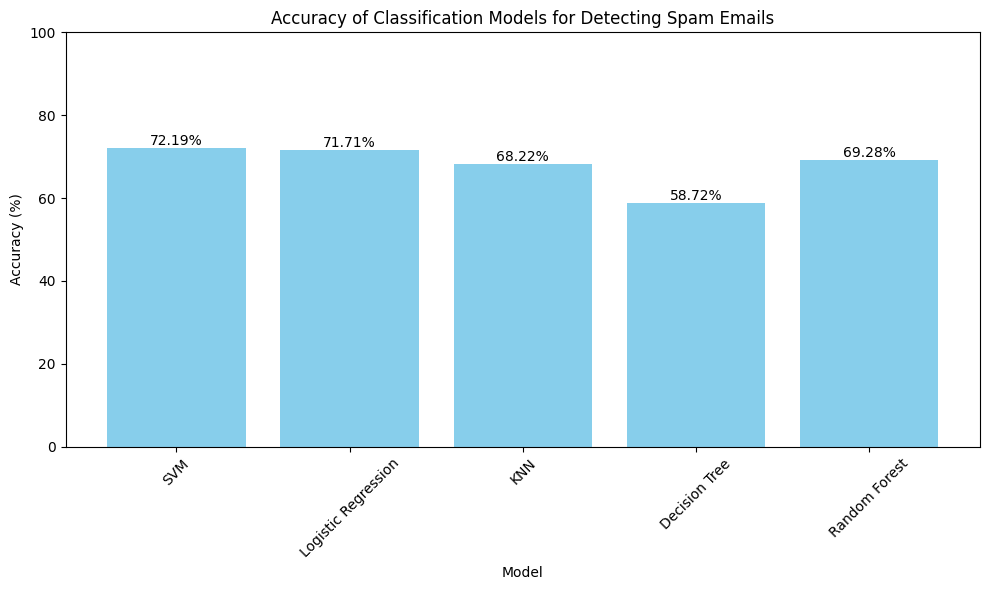

In [ ]:
import matplotlib.pyplot as plt

# Data akurasi
models = ['SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracy = [72.19, 71.71, 68.22, 58.72, 69.28]  # Masukkan nilai akurasi sesuai dengan urutan model

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Classification Models for Detecting Spam Emails')
plt.ylim(0, 100)  # Rentang sumbu y dari 0 sampai 100 untuk persentase

# Menampilkan angka di atas setiap batang
for i in range(len(models)):
    plt.text(i, accuracy[i], f'{accuracy[i]:.2f}%', ha='center', va='bottom')

# Menampilkan diagram
plt.xticks(rotation=45)  # Memutar label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()
